# Energy Requirements of Aluminum Frames MFGing
This journal documents the processing of literature data of the manufacturing energy of aluminum frames, from mining through extrusion, and recycling.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)
cwd = os.getcwd() #grabs current working directory

### Aluminum LCI 2019
This is a nice LCI/LCA from the International Aluminum Inst. updated in 2019. Pulling global energy details in here. NOTE MJ/tonne.

In [2]:
pd.read_excel(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-2019-LCI-energyGLO.xlsx")

,Unnamed: 0,Unnamed: 1,Bauxite mining,Alumina production,Paste,Anode,Electrolysis (S),Electrolysis (P),Casting,Unnamed: 9,SUM,Unnamed: 11
0,Energy input,NaN,NaN,NaN,NaN,NaN,stroberg 5%,prebake (95% marketshare),NaN,NaN,NaN,NaN
1,Heavy oil,MJ/t product,5.732475,842.034192,469.825029,559.321050,NaN,NaN,69.184075,NaN,NaN,NaN
2,Natural gas,MJ/t product,1.099623,2477.888492,53.596036,2097.355115,NaN,NaN,743.893708,NaN,NaN,NaN
3,Coal,MJ/t product,21.927162,6414.449581,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
4,Electricity,MJ/t product,22.971227,546.871252,396.447536,465.725257,60410.055312,51010.365432,392.943916,NaN,53305.309113,electricty sum
5,Other,MJ/t product,0.006372,168.263584,0.000000,116.020414,NaN,NaN,32.142607,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All but mining,CED all energy sources,NaN
7,SUM,NaN,51.736859,10449.507101,919.868601,3238.421836,60410.055312,51010.365432,1238.164305,67326.311769,67378.048628,NaN
8,% of overall energy step,NaN,0.000768,0.155088,0.013652,0.048063,0.044829,0.719223,0.018376,NaN,0.791138,% electricity
9,% Fuel each step,NaN,0.555999,0.947665,0.569017,0.856188,0,0,0.682640,0.208596,0.208862,% fuels


This resource also has timelines of energy demand of the two most energy intensive steps over time.

In [3]:
#alumina to aluminum
IAI_alumina_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAluminaRefineEnergy-MJpTonne.csv",
                                     index_col='year')
IAI_alumina_raw

,Africa & Asia (ex China),North America,South America,Europe,Oceania,China,World
year,,,,,,,
1995,15065,12528,12794,12094,12301,NaN,12621
1996,16455,12668,12580,11987,12213,NaN,12637
1997,16356,11356,12052,12191,12269,NaN,12339
1998,17468,11025,12144,13031,12126,40632.0,14919
1999,17106,11273,11709,12883,11964,38278.0,14774
2000,16687,11654,11903,12627,11370,35644.0,14479
2001,28080,20448,19915,26066,22250,44746.0,24931
2002,12938,11957,11436,13490,11375,33948.0,14554
2003,14536,10927,11112,12312,11745,32612.0,14193


In [4]:
IAI_alumina_kwhpkg = (IAI_alumina_raw*0.2777)/1000 #convert from MJ/tonne to kWh/kg
IAI_alumina_kwhpkg.loc[2001] = np.nan# drop the weirdness at 2001
IAI_alumina_kwhpkg.interpolate(inplace=True) #replace with interpolated data

Text(0.5, 1.0, 'Alumina Refining Energy')

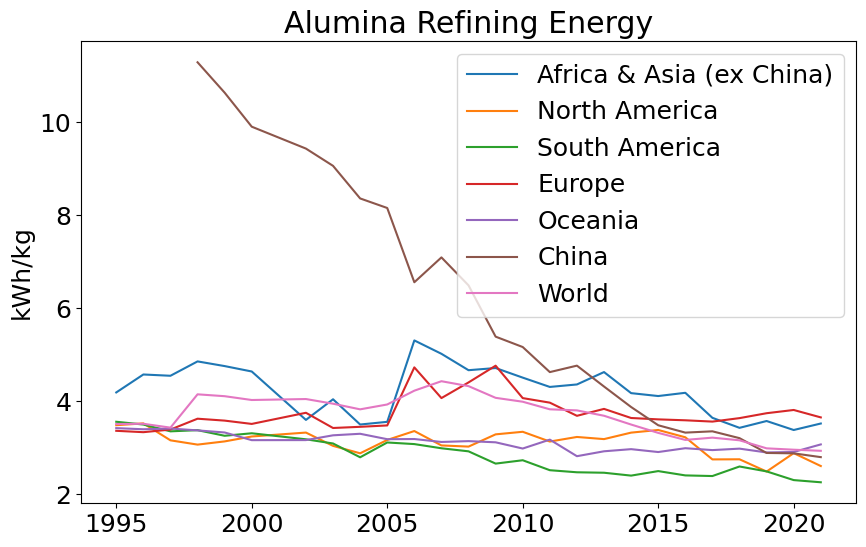

In [5]:
plt.plot(IAI_alumina_kwhpkg)
plt.legend(IAI_alumina_kwhpkg.columns)
plt.ylabel('kWh/kg')
plt.title('Alumina Refining Energy')

In [6]:
#Smelting energy
IAI_aluminumSmelt_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAlSmeltEnergy-kWhpTonne.csv",
                                     index_col=['year','Type'])
IAI_aluminumSmelt_raw.head()

Africa  North America  South America  \
year Type                                                       
1995 Total Energy_ac    15817.0        16048.0        15607.0   
     Process Energy_dc      NaN            NaN            NaN   
1996 Total Energy_ac    15238.0        15984.0        15678.0   
     Process Energy_dc      NaN            NaN            NaN   
1997 Total Energy_ac    15132.0        15985.0        15654.0   

                        Asia (ex China)   Europe  Oceania  \
year Type                                                   
1995 Total Energy_ac            16114.0  15603.0  15238.0   
     Process Energy_dc              NaN      NaN      NaN   
1996 Total Energy_ac            15821.0  15440.0  15231.0   
     Process Energy_dc              NaN      NaN      NaN   
1997 Total Energy_ac            15765.0  15619.0  15187.0   

                        Gulf Cooperation Council  China    World  
year Type                                                         
1995 Total Energy_ac                         NaN  16600  15878.0  
     Process Energy_dc                       NaN  14530      NaN  
1996 Total Energy_ac                         NaN  16065  15718.0  
     Process Energy_dc                       NaN  14487      NaN  
1997 Total Energy_ac                         NaN  15858  15711.0

In [7]:
#we probably only want the total energy, as process energy is dc.
#IAI_aluminumSmelt_raw.loc[(slice(None),['Total Energy_ac']),:] #slice on the multilevel
#IAI_aluminumSmelt_totE = IAI_aluminumSmelt_raw[['World']].xs('Total Energy_ac', level=1) # slice on the multilevel, option to drop the type column
IAI_aluminumSmelt_totE = IAI_aluminumSmelt_raw.xs('Total Energy_ac', level=1) # slice on the multilevel, option to drop the type column
IAI_aluminumSmelt_totE.head()

,Africa,North America,South America,Asia (ex China),Europe,Oceania,Gulf Cooperation Council,China,World
year,,,,,,,,,
1995,15817.0,16048.0,15607.0,16114.0,15603.0,15238.0,NaN,16600,15878.0
1996,15238.0,15984.0,15678.0,15821.0,15440.0,15231.0,NaN,16065,15718.0
1997,15132.0,15985.0,15654.0,15765.0,15619.0,15187.0,NaN,15858,15711.0
1998,15084.0,15940.0,15958.0,15831.0,15548.0,15259.0,NaN,15473,15679.0
1999,15024.0,15371.0,15340.0,15323.0,15193.0,14852.0,NaN,15603,15282.0


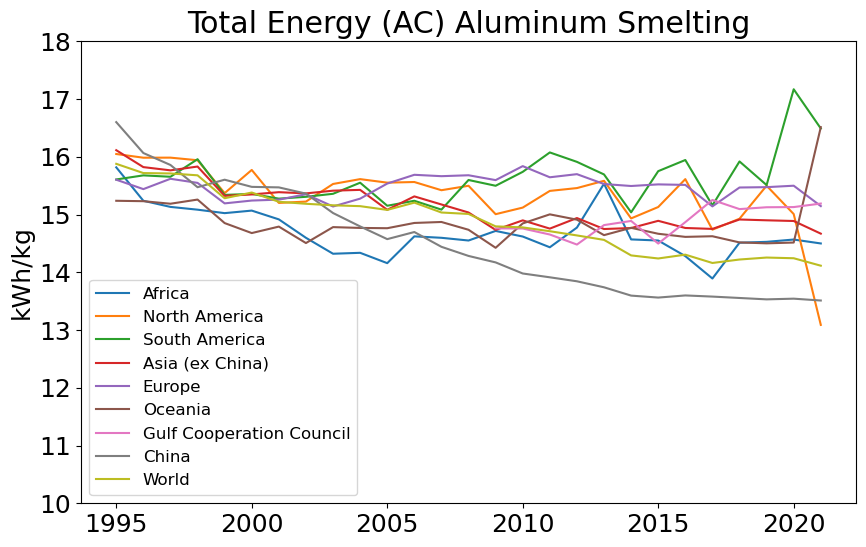

In [8]:
plt.plot(IAI_aluminumSmelt_totE/1000)
plt.title('Total Energy (AC) Aluminum Smelting')
plt.ylabel('kWh/kg')
plt.ylim(10,18)
plt.legend(IAI_aluminumSmelt_totE.columns, fontsize=12, loc='lower left')

In [9]:
#add these two processes together
IAI_alumina_kwhpkg_world = IAI_alumina_kwhpkg[['World']]
IAI_aluminumSmelt_totE_world = IAI_aluminumSmelt_totE[['World']]/1000
IAI_refinesmelt_world = IAI_alumina_kwhpkg_world + IAI_aluminumSmelt_totE_world

(10.0, 22.0)

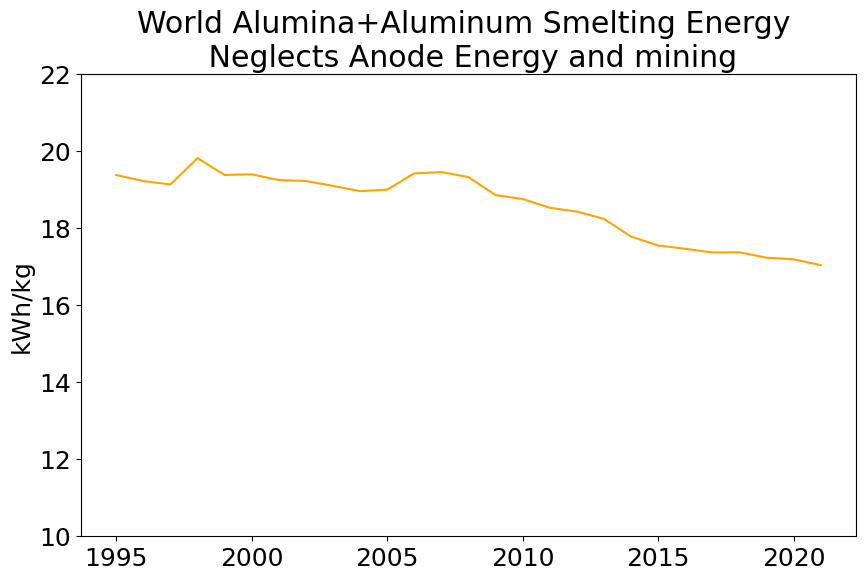

In [10]:
plt.plot(IAI_refinesmelt_world, color='orange')
plt.title('World Alumina+Aluminum Smelting Energy \n Neglects Anode Energy and mining')
plt.ylabel('kWh/kg')
plt.ylim(10,22)

## Bauxite Mining

In [11]:
#skipcols = ['Source', 'Notes','Country']
e_mineAl_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-mining.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [12]:
e_mineAl_raw.dropna(how='all')

,E_mine_kWhpkg,PrctFuel,Source,Notes
year,,,,
2003,0.32000,NaN,U.S. Energy Requirements for Aluminum Producti...,"pg 29/14, bauxite mining, 16.7 kg CO2"
2011,9.72195,NaN,"Norgate, Terry, and Sharif Jahanshahi. 2011. “...","Al mining and mineral processing, embodied E"
2018,0.01400,56%,World Aluminium — Primary Aluminium Production...,"calculations from 2019 LCI, see excel GLO, rem..."
2019,0.00039,"mostly fuels, some electricity","Farjana, S.H., Huda, N. and Mahmud, M.A.P. (20...","bauxite mining, electricity shown, mostly fuels"
2020,1.13000,NaN,"Farjana, S.H., Huda, N. and Mahmud, M.A.P. (20...",Table 7 bauxite hhv


Mining energy is a small contributor. Unlike other ores, bauxite usually doesnt require blasting or apparently significant sorting/crushing. For conservative estimate, we will take the mean of the energy values and use 56% fuels from IAI (2018).

In [13]:
mine_avg = e_mineAl_raw[['E_mine_kWhpkg']].mean().values
e_mineAl = pd.DataFrame({'E_mine_kWhpkg':mine_avg, 'PrctFuel':56}, index=e_mineAl_raw.index)
e_mineAl.head()

,E_mine_kWhpkg,PrctFuel
year,,
1995,2.237268,56
1996,2.237268,56
1997,2.237268,56
1998,2.237268,56
1999,2.237268,56


## Alumina Production & Aluminum Smelting
This step includes the production of alumina from bauxite, and the smelting of aluminum from alumina through the Hall-H process. Energy of the anode has been included here (i.e. more than just electricity and fuels) because the anode is critical and is mostly fuels and electricity.

In [14]:
#skipcols = ['Source', 'Notes','Country']
e_refinesmeltAl_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-refinesmelt.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [15]:
e_refinesmeltAl_raw.dropna(how='all')

,E_refineSmelt_kWhpkg,PrctFuel,Source,Notes
year,,,,
1993,16.300000,NaN,U.S. Energy Requirements for Aluminum Producti...,"Figure 5.2, electricity only"
1995,55.000000,NaN,"G. J. M. Phylipsen and E. A. Alsema, “Environm...","""gross energy requirement of Al feedstock"""
1996,16.100000,NaN,U.S. Energy Requirements for Aluminum Producti...,"Figure 5.2, electricity only"
1998,15.600000,NaN,U.S. Energy Requirements for Aluminum Producti...,"Figure 5.2, electricity only"
2000,58.700000,NaN,"Rankin, John. 2012. “Energy Use in Metal Produ...",embodied energy primary production
2003,61.860000,NaN,U.S. Energy Requirements for Aluminum Producti...,bauxite to alumina (7.27)+carbon anode product...
2009,14.600000,NaN,"Bleiwas, Donald. 2011. “Estimates of Electrici...","Table 7, average of Africa Al mining and refin..."
2011,48.609750,NaN,"Norgate, Terry, and Sharif Jahanshahi. 2011. “...","Al extraction and refining, embodied E"
2018,18.709948,21.0,World Aluminium — Primary Aluminium Production...,"calculations from 2019 LCI, see excel GLO, mos..."


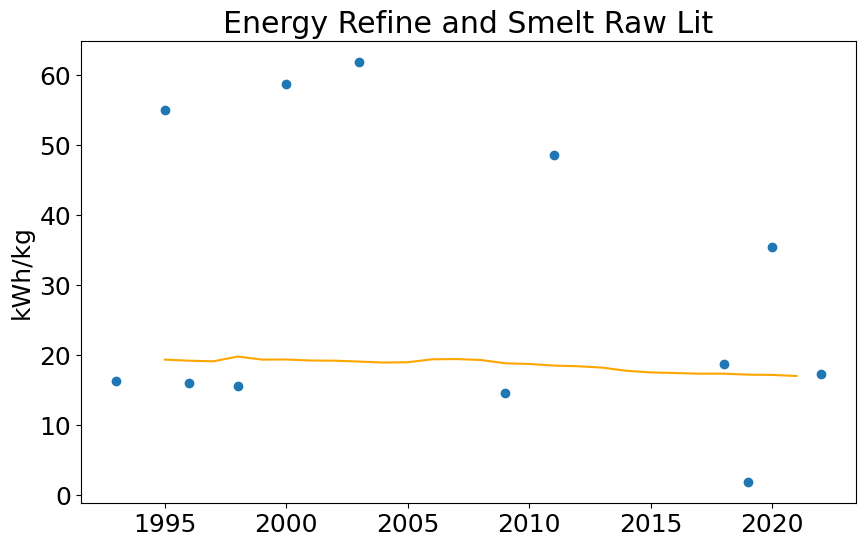

In [16]:
plt.scatter(e_refinesmeltAl_raw.index, e_refinesmeltAl_raw['E_refineSmelt_kWhpkg'], marker='o')
plt.title('Energy Refine and Smelt Raw Lit')
plt.ylabel('kWh/kg')
plt.plot(IAI_refinesmelt_world, color='orange')

In [17]:
#teasing out the differences
e_refinesmeltAl_trim = e_refinesmeltAl_raw.dropna(how='all')
e_refinesmeltAl_trim_elecOnly = e_refinesmeltAl_trim[e_refinesmeltAl_trim['Notes'].str.contains('electricity only')]
e_refinesmeltAl_trim_elecOnly.index

Int64Index([1993, 1996, 1998, 2009, 2019], dtype='int64', name='year')

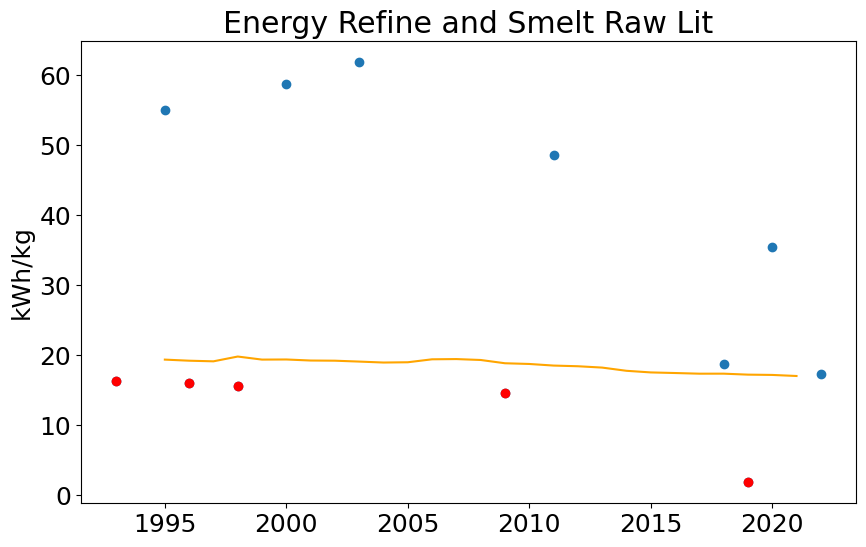

In [18]:
plt.scatter(e_refinesmeltAl_raw.index, e_refinesmeltAl_raw['E_refineSmelt_kWhpkg'], marker='o')
plt.scatter(e_refinesmeltAl_trim_elecOnly.index, e_refinesmeltAl_trim_elecOnly['E_refineSmelt_kWhpkg'], marker='o', color='red')

plt.title('Energy Refine and Smelt Raw Lit')
plt.ylabel('kWh/kg')
plt.plot(IAI_refinesmelt_world, color='orange')

The low values are electricity only, while the higher values are full energy demand. Therefore we will drop those numbers, and interpolate between the full energy numbers

In [19]:
#set the electricity only rows to Nan
e_refinesmeltAl = e_refinesmeltAl_raw.copy()
e_refinesmeltAl.loc[e_refinesmeltAl_raw.index.isin(e_refinesmeltAl_trim_elecOnly.index),:]=np.nan
e_refinesmeltAl.head()

,E_refineSmelt_kWhpkg,PrctFuel,Source,Notes
year,,,,
1993,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN
1995,55.0,NaN,"G. J. M. Phylipsen and E. A. Alsema, “Environm...","""gross energy requirement of Al feedstock"""
1996,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN


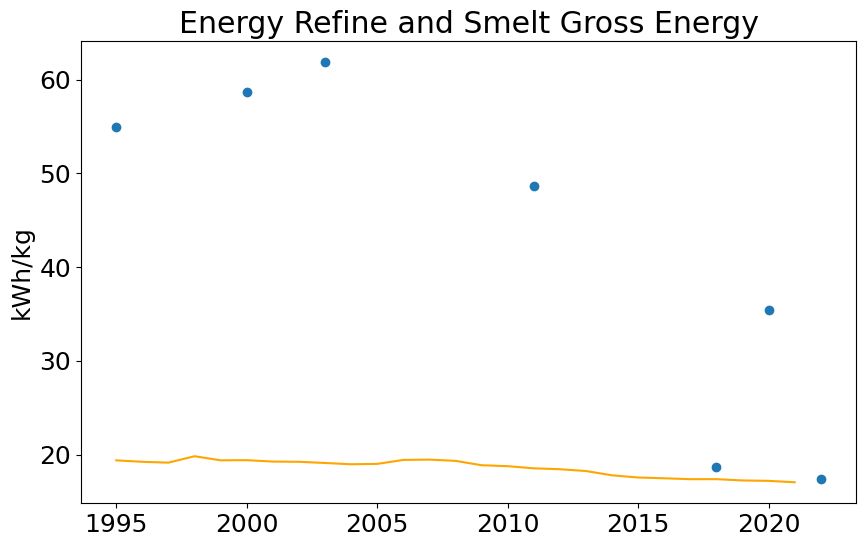

In [20]:
plt.scatter(e_refinesmeltAl.index, e_refinesmeltAl['E_refineSmelt_kWhpkg'], marker='o')

plt.title('Energy Refine and Smelt Gross Energy')
plt.ylabel('kWh/kg')
plt.plot(IAI_refinesmelt_world, color='orange')

In [21]:
e_refinesmeltAl.dropna(how='all')

,E_refineSmelt_kWhpkg,PrctFuel,Source,Notes
year,,,,
1995,55.000000,NaN,"G. J. M. Phylipsen and E. A. Alsema, “Environm...","""gross energy requirement of Al feedstock"""
2000,58.700000,NaN,"Rankin, John. 2012. “Energy Use in Metal Produ...",embodied energy primary production
2003,61.860000,NaN,U.S. Energy Requirements for Aluminum Producti...,bauxite to alumina (7.27)+carbon anode product...
2011,48.609750,NaN,"Norgate, Terry, and Sharif Jahanshahi. 2011. “...","Al extraction and refining, embodied E"
2018,18.709948,21.0,World Aluminium — Primary Aluminium Production...,"calculations from 2019 LCI, see excel GLO, mos..."
2020,35.458234,NaN,"Farjana, S.H., Huda, N. and Mahmud, M.A.P. (20...","Table 7 alumina, smelting and refining HHV"
2022,17.388888,NaN,"Lennon, A. et al. (2022) ‘The aluminium demand...","suplement table S2, all energy, bauxite to alu..."


Based on the resources and level of detailed information provided, I trust the International Aluminum Institute and (therefore) Lennon et al 2022 more than Farjana. Therefore, we will drop Farjana and interpolate. We will also use the 21% fuels vs electricity from IAI (2018).

In [22]:
e_refinesmeltAl.loc[2020]=np.nan #droping Farjana
e_refinesmeltAl_filled = e_refinesmeltAl.loc[1995:,['E_refineSmelt_kWhpkg']].interpolate()
e_refinesmeltAl_filled['PrctFuel'] = e_refinesmeltAl.loc[2018,'PrctFuel']

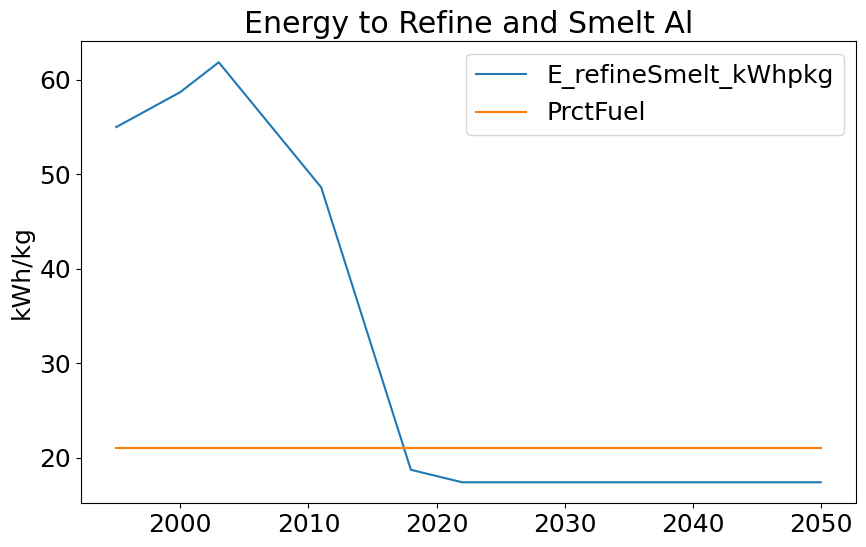

In [23]:
plt.plot(e_refinesmeltAl_filled)
plt.title('Energy to Refine and Smelt Al')
plt.ylabel('kWh/kg')
plt.legend(e_refinesmeltAl_filled.columns)

## Casting, Extruding, Anodizing

In [24]:
#skipcols = ['Source', 'Notes','Country']
e_formanodize_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-formanodize.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [25]:
e_formanodize_raw.dropna(how='all')

,E_extrude_kWhpkg,PrctFuel,Source,Notes,E_anodize_kWhpkg,Unit,Source.1,Notes.1
year,,,,,,,,
1996,5.560000,NaN,"G. J. M. Phylipsen and E. A. Alsema, “Environm...",extrusion only,2.78,kWh/kg,"G. J. M. Phylipsen and E. A. Alsema, “Environm...",anodize only
2003,1.520000,87.0,U.S. Energy Requirements for Aluminum Producti...,"extruded product avg, 87% FossilThermal, yield...",NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,24.58,kWh/m2,"Harscoet, E. and Froelich, D. (2008) ‘Use of L...",thermal
2008,NaN,NaN,NaN,NaN,3.50,kWh/m2,"Harscoet, E. and Froelich, D. (2008) ‘Use of L...",electrical
2009,1.703967,NaN,"Liu, G. and Müller, D.B. (2012) ‘Addressing su...","Figure S1, from US DOE Industrial surveys 2009...",NaN,NaN,NaN,NaN


These are not helped by plotting. extrude and anodize seem to be mostly thermal processes maxing out around 5 kWh/kg. (Note the Harscoet is in kg/m2, not per mass and are intented to be added together. Therefore we will assume 5 kWh/kg and 87% of the energy is fuels for thermal.

In [26]:
e_formanodize = pd.DataFrame({'E_formanodize_kWhpkg':5.0,'PrctFuel':87}, index=e_formanodize_raw.index)

In [27]:
#plt.plot(e_formanodize)

## Sum the Mining, Refine and Smelt, and Form and Anodize Energies

In [28]:
pd.concat([e_refinesmeltAl_filled,e_formanodize], axis=1)

,E_refineSmelt_kWhpkg,PrctFuel,E_formanodize_kWhpkg,PrctFuel
year,,,,
1995,55.000000,21.0,5.0,87
1996,55.740000,21.0,5.0,87
1997,56.480000,21.0,5.0,87
1998,57.220000,21.0,5.0,87
1999,57.960000,21.0,5.0,87
2000,58.700000,21.0,5.0,87
2001,59.753333,21.0,5.0,87
2002,60.806667,21.0,5.0,87
2003,61.860000,21.0,5.0,87


In [29]:
e_AlFrames = e_refinesmeltAl_filled['E_refineSmelt_kWhpkg']+e_formanodize['E_formanodize_kWhpkg']

In [30]:
#e_mine_wtd = e_mineAl['E_mine_kWhpkg']*(e_mineAl['PrctFuel']/100)
e_refine_wtd = e_refinesmeltAl_filled['E_refineSmelt_kWhpkg']*(e_refinesmeltAl_filled['PrctFuel']/100)
e_form_wtd = e_formanodize['E_formanodize_kWhpkg']*(e_formanodize['PrctFuel']/100)
fuel_sum = e_refine_wtd+e_form_wtd

In [31]:
fuel_prct = fuel_sum/e_AlFrames

In [32]:
e_AlFrames_final = pd.concat([e_AlFrames,fuel_prct*100], axis=1, keys=['E_AlFrames_kWhpkg','PrctFuel'])
e_AlFrames_final.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output-energy-aluminumframes.csv")

## Cumulative Energy Demand Comparison

In [33]:
#skipcols = ['Source', 'Notes','Country']
e_AlCED_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-CED.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [34]:
e_AlCED_raw.dropna(how='all')

,PED_kWhpkg,PrctFuel,Source,Notes
year,,,,
2003,62.200000,NaN,U.S. Energy Requirements for Aluminum Producti...,"pg 64/79, (62.2 tf)"
2007,58.610000,NaN,"Norgate, T.E., Jahanshahi, S. and Rankin, W.J....","cradle to gate, likely doesn't include forming..."
2009,45.276510,NaN,"Nunez, P. and Jones, S. (2016) ‘Cradle to gate...","depletion of fossil fuels, Table 4. IAI team"
2010,55.550000,NaN,"Strachala, Dávid, Josef Hylskỳ, Jiří Vaněk, Gü...","electricity only, primary production cites Bal..."
2015,28.444436,69.0,"Wang, M.J. (2022) The Environmental Footprint ...","Table 7-16, PED of extruded al product, includ..."
2016,37.499895,60.0,"Wang, M.J. (2022) The Environmental Footprint ...","Table 7-6, and Table 7-7 fairly similar"
2017,29.443620,50.0,"Yang, Y. et al. (2019) ‘Environmental impact a...",Table 3 PED total for hydropower
2018,73.053510,25.0,"Yang, Y. et al. (2019) ‘Environmental impact a...",Table 2 PED total thermal based (not hydropower)
2019,18.716059,21.0,World Aluminium — Primary Aluminium Production...,"calculations from 2019 LCI, see excel GLO"


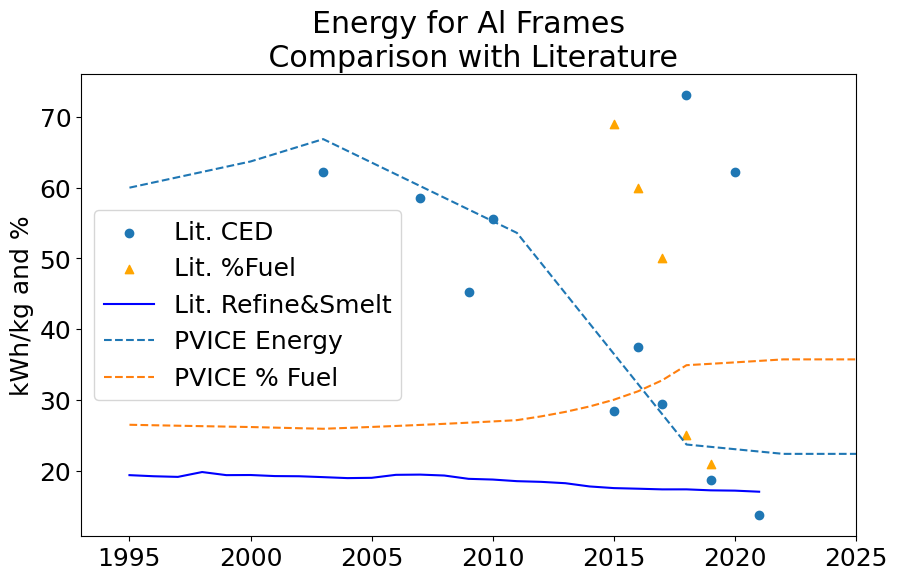

In [35]:
#literature
plt.scatter(e_AlCED_raw.index, e_AlCED_raw['PED_kWhpkg'], marker='o', label='Lit. CED')
plt.scatter(e_AlCED_raw.index, e_AlCED_raw['PrctFuel'], marker='^', color='orange', label='Lit. %Fuel')
plt.plot(IAI_refinesmelt_world, color='blue', label='Lit. Refine&Smelt')
#our baseline
plt.plot(e_AlFrames_final, label=['PVICE Energy','PVICE % Fuel'], ls='--')

plt.title('Energy for Al Frames\n Comparison with Literature')
plt.ylabel('kWh/kg and %')
plt.xlim(1993,2025)
plt.legend()

## Recycling

In [36]:
#skipcols = ['Source', 'Notes','Country']
e_recycleAl_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-aluminum-recycle.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [37]:
e_recycleAl_raw.dropna(how='all')

,E_recycle_kWhpkg,PrctFuel,Source,Notes
year,,,,
1975,1.650000,NaN,"Bravard, J. C., H. B. Flora, and Charles Porta...","<5% of virgin ore, likely includes thermal"
1976,1.820000,NaN,"Bravard, J. C., H. B. Flora, and Charles Porta...",NaN
1977,1.680000,NaN,"Bravard, J. C., H. B. Flora, and Charles Porta...","page 18, re-melt and pre processing Al scrap"
1978,4.860000,NaN,"Rankin, John. 2012. “Energy Use in Metal Produ...","secondary production, 5-10% of primary product..."
1998,2.800000,NaN,"Das, S.K. et al. (2010) ‘Aluminum recycling—An...",cites 1998 LCA from North American Aluminum As...
2003,2.800000,NaN,U.S. Energy Requirements for Aluminum Producti...,"page 64/79, thermal energy"
2006,NaN,NaN,"Plunkert, P.A. (2006) Aluminum Recycling in th...","cites a DOE 2003 report, 5%-8% of PED"
2011,2.222216,NaN,"Strachala, Dávid, Josef Hylskỳ, Jiří Vaněk, Gü...","cites Balomenos 2011, includes thermal and ele..."
2014,8.610870,NaN,"Goe, Michele, and Gabrielle Gaustad. 2016. “Es...",unknown source


The regular reported energy savings is that recycling is only ~5% of primary Al production. So either I can use these raw data, OR can take 5% of the CED of Al MFGing energy

Text(0, 0.5, 'kWh/kg')

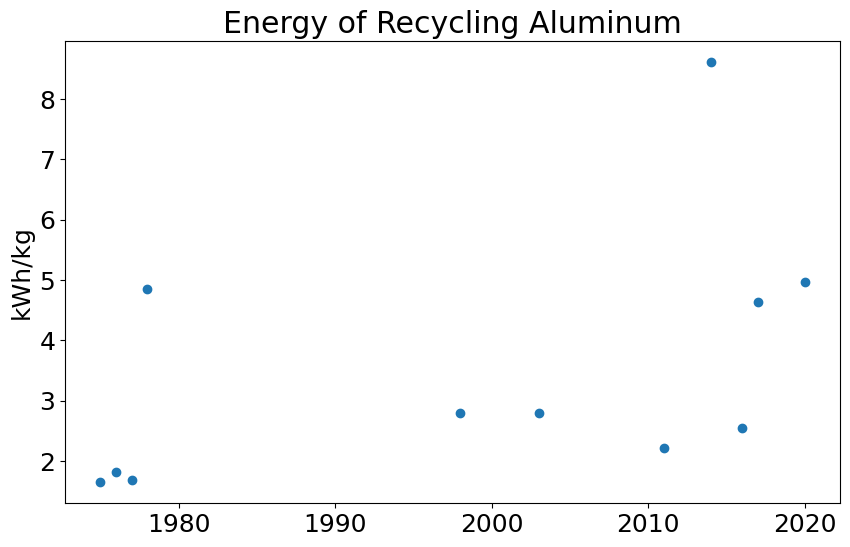

In [38]:
plt.scatter(e_recycleAl_raw.index,e_recycleAl_raw['E_recycle_kWhpkg'])
plt.title('Energy of Recycling Aluminum')
plt.ylabel('kWh/kg')

In [39]:
e_recycleAl_raw['E_recycle_kWhpkg'].mean()

3.5089545747272726

In [40]:
e_recycleAl_raw['E_recycle_kWhpkg'].mean()/e_AlFrames_final['E_AlFrames_kWhpkg']

year
1995    0.058483
1996    0.057770
1997    0.057075
1998    0.056396
1999    0.055733
2000    0.055086
2001    0.054190
2002    0.053322
2003    0.052482
2004    0.053815
2005    0.055218
2006    0.056696
2007    0.058255
2008    0.059902
2009    0.061645
2010    0.063492
2011    0.065454
2012    0.071120
2013    0.077861
2014    0.086013
2015    0.096072
2016    0.108796
2017    0.125403
2018    0.147995
2019    0.150086
2020    0.152236
2021    0.154449
2022    0.156728
2023    0.156728
2024    0.156728
2025    0.156728
2026    0.156728
2027    0.156728
2028    0.156728
2029    0.156728
2030    0.156728
2031    0.156728
2032    0.156728
2033    0.156728
2034    0.156728
2035    0.156728
2036    0.156728
2037    0.156728
2038    0.156728
2039    0.156728
2040    0.156728
2041    0.156728
2042    0.156728
2043    0.156728
2044    0.156728
2045    0.156728
2046    0.156728
2047    0.156728
2048    0.156728
2049    0.156728
2050    0.156728
Name: E_AlFrames_kWhpkg, dtype: float64

The mean gets to be ~15% of CED, which is too high, and it increases over time, which we don't expect, so we can't just use the mean.

In [41]:
e_AlFrames_final['E_AlFrames_kWhpkg']*0.08

year
1995    4.800000
1996    4.859200
1997    4.918400
1998    4.977600
1999    5.036800
2000    5.096000
2001    5.180267
2002    5.264533
2003    5.348800
2004    5.216298
2005    5.083795
2006    4.951293
2007    4.818790
2008    4.686287
2009    4.553785
2010    4.421283
2011    4.288780
2012    3.947068
2013    3.605356
2014    3.263644
2015    2.921932
2016    2.580220
2017    2.238508
2018    1.896796
2019    1.870375
2020    1.843953
2021    1.817532
2022    1.791111
2023    1.791111
2024    1.791111
2025    1.791111
2026    1.791111
2027    1.791111
2028    1.791111
2029    1.791111
2030    1.791111
2031    1.791111
2032    1.791111
2033    1.791111
2034    1.791111
2035    1.791111
2036    1.791111
2037    1.791111
2038    1.791111
2039    1.791111
2040    1.791111
2041    1.791111
2042    1.791111
2043    1.791111
2044    1.791111
2045    1.791111
2046    1.791111
2047    1.791111
2048    1.791111
2049    1.791111
2050    1.791111
Name: E_AlFrames_kWhpkg, dtype: float64

8% of the CEd is more reasonable, but drops fairly low by the end.

The Wang 2022 publication from The Aluminum Association is an LCA update with global data from manufacturers. This publication also breaks down 100% recycled scrap (CED of 2.5 kWh/kg, 7% of their primary Al CED) and a product realistic which has a high recycled content but uses a small amount of primary aluminum to enable precise alloying (CED of 4.6 kWh/kg, 12% of primary Al CED). We will therefore use these data.

* LQ open-loop recycling will be 2.5 kWh/kg.
* HQ open-loop and closed-loop recycling will be an additional 2.1 kWh/kg at EOL. For MFG HQ, no additional energy is needed, since it just gets remelted with no contamination issues.
* 80% fuel fraction will be used for recycled material

In [43]:
4.6/e_AlFrames_final['E_AlFrames_kWhpkg']

year
1995    0.076667
1996    0.075733
1997    0.074821
1998    0.073931
1999    0.073062
2000    0.072214
2001    0.071039
2002    0.069902
2003    0.068800
2004    0.070548
2005    0.072387
2006    0.074324
2007    0.076368
2008    0.078527
2009    0.080812
2010    0.083234
2011    0.085805
2012    0.093234
2013    0.102070
2014    0.112757
2015    0.125944
2016    0.142624
2017    0.164395
2018    0.194011
2019    0.196752
2020    0.199571
2021    0.202472
2022    0.205459
2023    0.205459
2024    0.205459
2025    0.205459
2026    0.205459
2027    0.205459
2028    0.205459
2029    0.205459
2030    0.205459
2031    0.205459
2032    0.205459
2033    0.205459
2034    0.205459
2035    0.205459
2036    0.205459
2037    0.205459
2038    0.205459
2039    0.205459
2040    0.205459
2041    0.205459
2042    0.205459
2043    0.205459
2044    0.205459
2045    0.205459
2046    0.205459
2047    0.205459
2048    0.205459
2049    0.205459
2050    0.205459
Name: E_AlFrames_kWhpkg, dtype: float64